In [5]:
import matplotlib.pyplot as plt  #import matplotlib for visualization
import seaborn as sns #data visulaization library based on matplotlib
import numpy as np #imports a fast numerical programming library
import pandas as pd #imports panda for easy data analysis and manipulation
from sklearn.model_selection import train_test_split #import train_test_split function from model_selction for data splitting
from sklearn.preprocessing import Normalizer #import preprocessing for data normalization
from sklearn.neighbors import KNeighborsClassifier #import the KNeighborsClassifier from sklearn
from sklearn import metrics #imports metrics model to check for accuracy
from scipy.stats import mode #imports module that contain large number of statistical functions 
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder #importing label encoder to change strings to numbers
le = LabelEncoder()
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR 
from sklearn.svm import LinearSVR 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics #imports metrics model to check for accuracy
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor


import warnings
warnings.filterwarnings("ignore") #to remove unwanted warnings

/Users/mariamsherif/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# EDA

Data preparation : 
We loaded the dataset into a Pandas, displayed the first five rows and performed basic data exploration;
we also checked the data shape, type and generated descriptive statistics as well as pre-processed the data by handling missing values/outliers. Finally we converted categorical variables to numerical variables using an encoder.

In [6]:
# load diamonds data into data frame
df = pd.read_csv('diamonds.csv')
# display first five rows of data
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [7]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)

(53940, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [9]:
df.describe() # get feature info

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [10]:
print("Number of rows with x == 0: {} ".format((df.x==0).sum()))
print("Number of rows with y == 0: {} ".format((df.y==0).sum()))
print("Number of rows with z == 0: {} ".format((df.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((df.depth==0).sum()))

Number of rows with x == 0: 8 
Number of rows with y == 0: 7 
Number of rows with z == 0: 20 
Number of rows with depth == 0: 0 


In [11]:
df[['x','y','z']] = df[['x','y','z']].replace(0,np.NaN)
df.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

In [12]:
df['x'].value_counts()  # get highest frequencies for x

x
4.37     448
4.34     437
4.33     429
4.38     428
4.32     425
        ... 
10.74      1
9.36       1
8.89       1
10.23      1
10.00      1
Name: count, Length: 553, dtype: int64

In [13]:
df['y'].value_counts()  # get highest frequencies for y

y
4.34     437
4.37     435
4.35     425
4.33     421
4.32     414
        ... 
8.89       1
10.16      1
9.46       1
9.63       1
31.80      1
Name: count, Length: 551, dtype: int64

In [14]:
df['z'].value_counts()  # get highest frequencies for z

z
2.70     767
2.69     748
2.71     738
2.68     730
2.72     697
        ... 
5.79       1
5.72       1
5.91       1
5.61       1
31.80      1
Name: count, Length: 374, dtype: int64

In [15]:
df['x'] = df['x'].replace(np.nan,448) #replacing the null values with 448 since it has the highest frequency
df['y'] = df['y'].replace(np.nan,437) #replacing the null values with 437 since it has the highest frequency
df['z'] = df['z'].replace(np.nan,767) #replacing the null values with 767 since it has the highest frequency

df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [16]:
df.isna().sum() # check nulls

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [17]:
#encoding categorical data that was in string form to numerical data
df["cut2"] = le.fit_transform(df["cut"])
df["color2"] = le.fit_transform(df["color"])
df["clarity2"] = le.fit_transform(df["clarity"])
df= df.drop(columns = ["cut", "clarity", "color"])


In [18]:
df['vol'] = df['x']*df['y']*df['z']
df.drop(['x', 'y', 'z'], axis=1, inplace=True)
df.head()

carat  depth  table  price  cut2  color2  clarity2        vol
0   0.23   61.5   55.0    326     2       1         3  38.202030
1   0.21   59.8   61.0    326     3       1         2  34.505856
2   0.23   56.9   65.0    327     1       1         4  38.076885
3   0.29   62.4   58.0    334     3       5         5  46.724580
4   0.31   63.3   58.0    335     1       6         3  51.917250

Data Exploration: 
We performed exploratory data analysis to gain insights into the diamond data set and identified patterns and relationships using multiple types of charts and plots. Doing that, we were able to visualize the data and conduct a correlation analysis between the features.

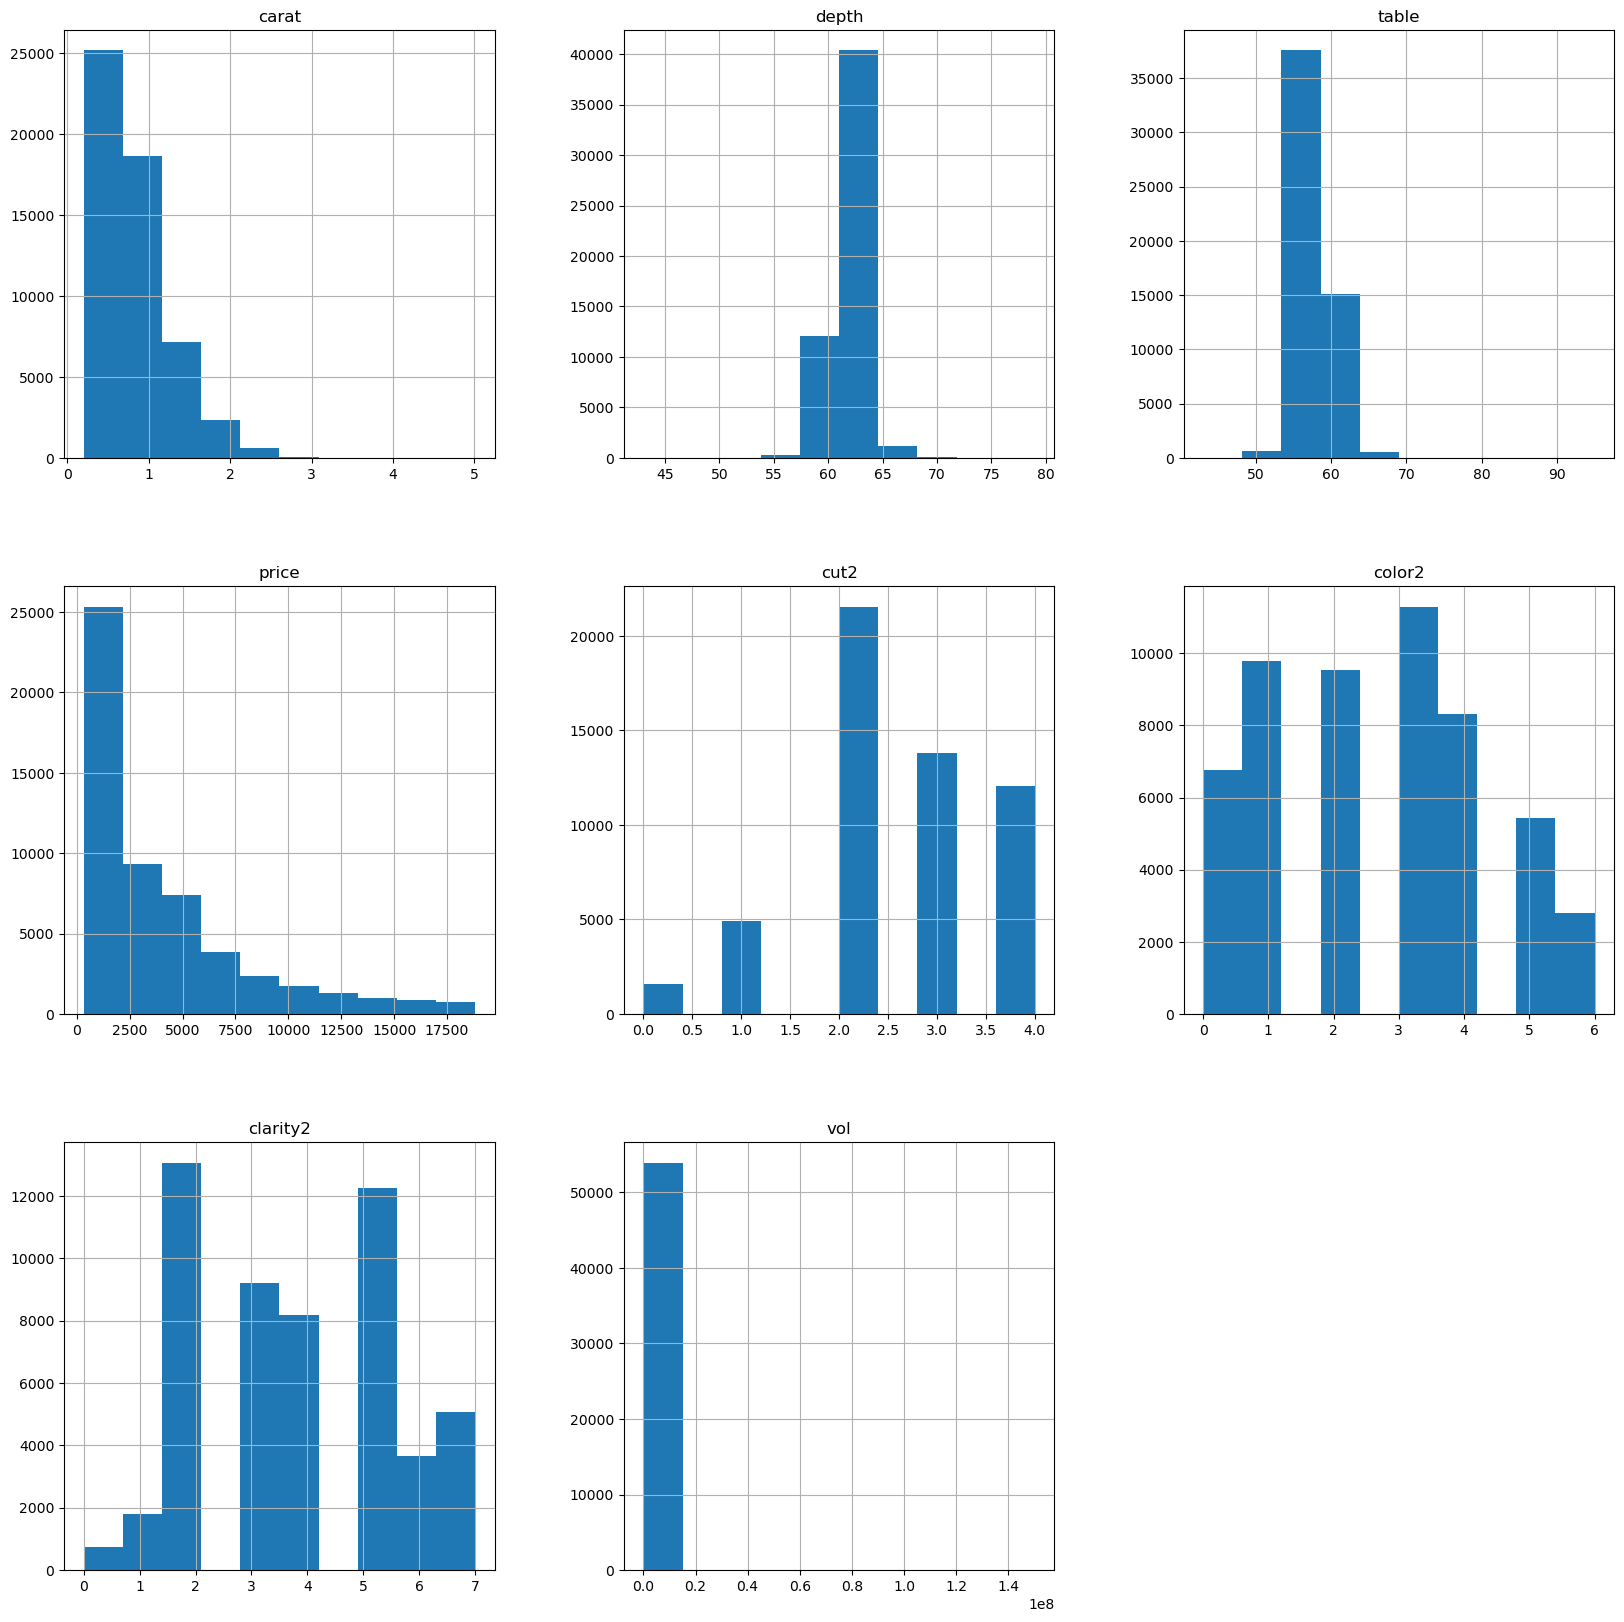

In [19]:
df.hist(figsize=(20,20)); # get count histogram for each feature

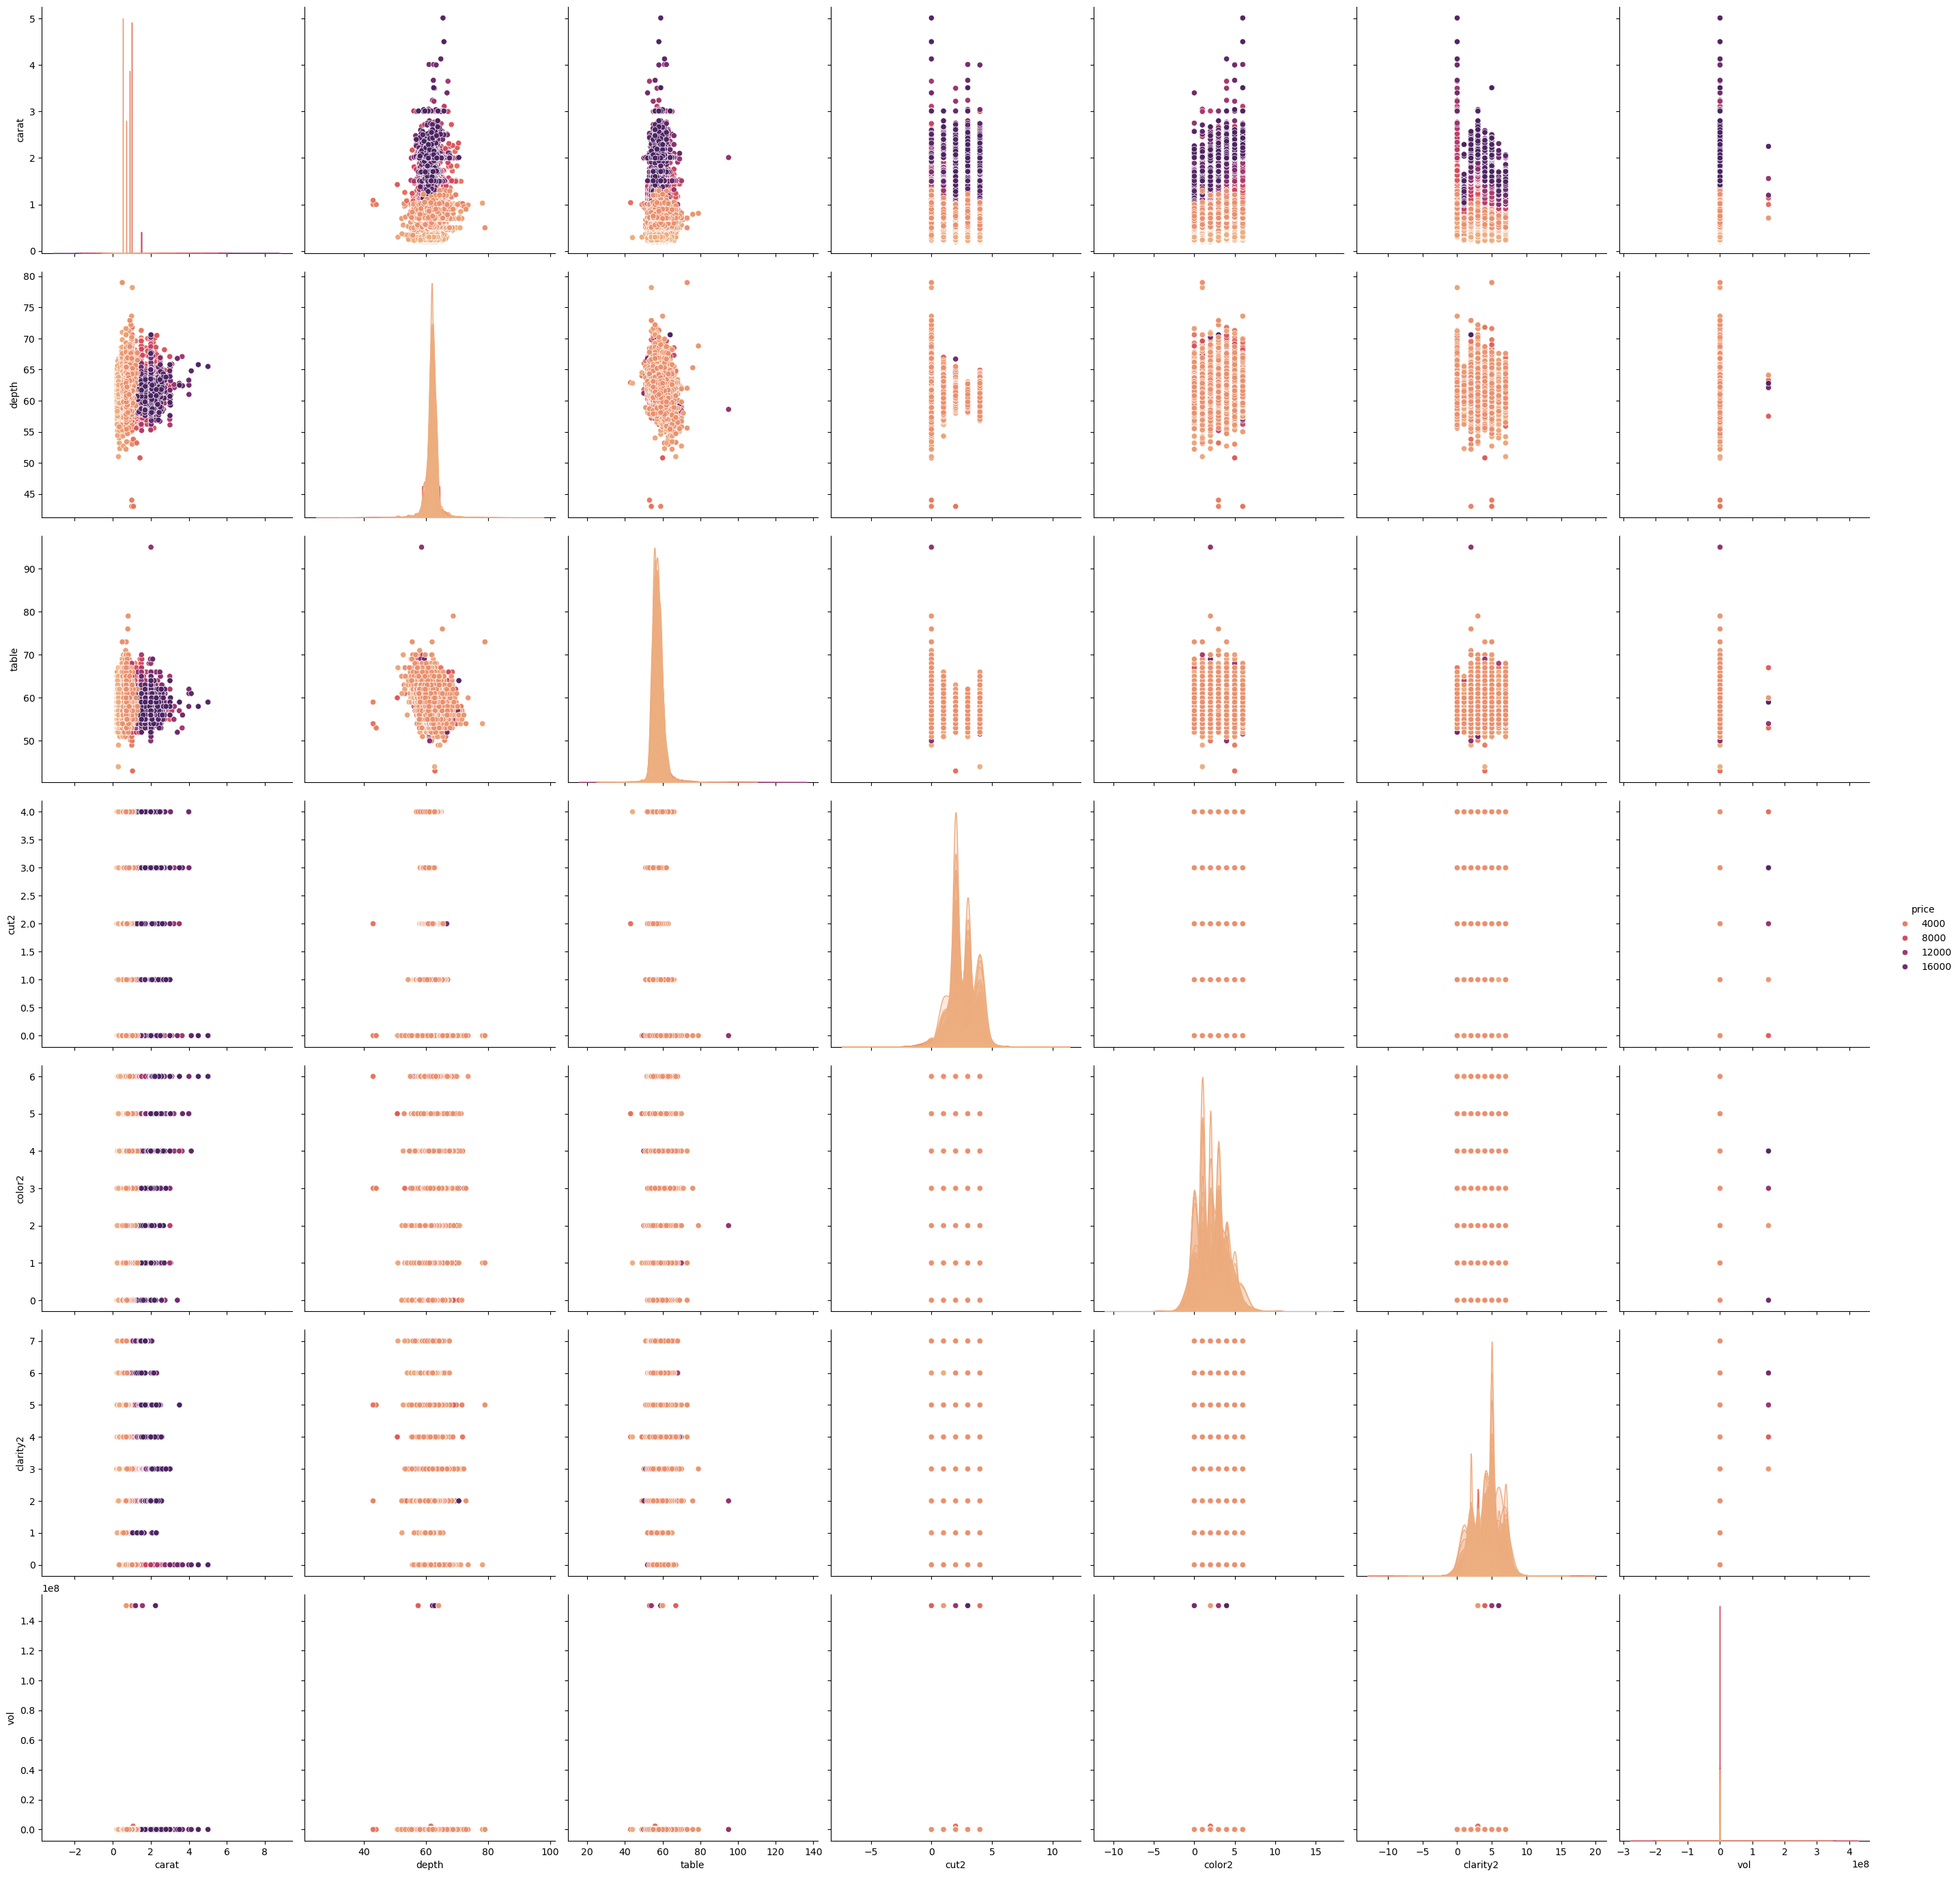

In [17]:
sns.pairplot(df, hue = "price", height=4, palette= 'flare') # draw pairplot to deduce correlations between features 

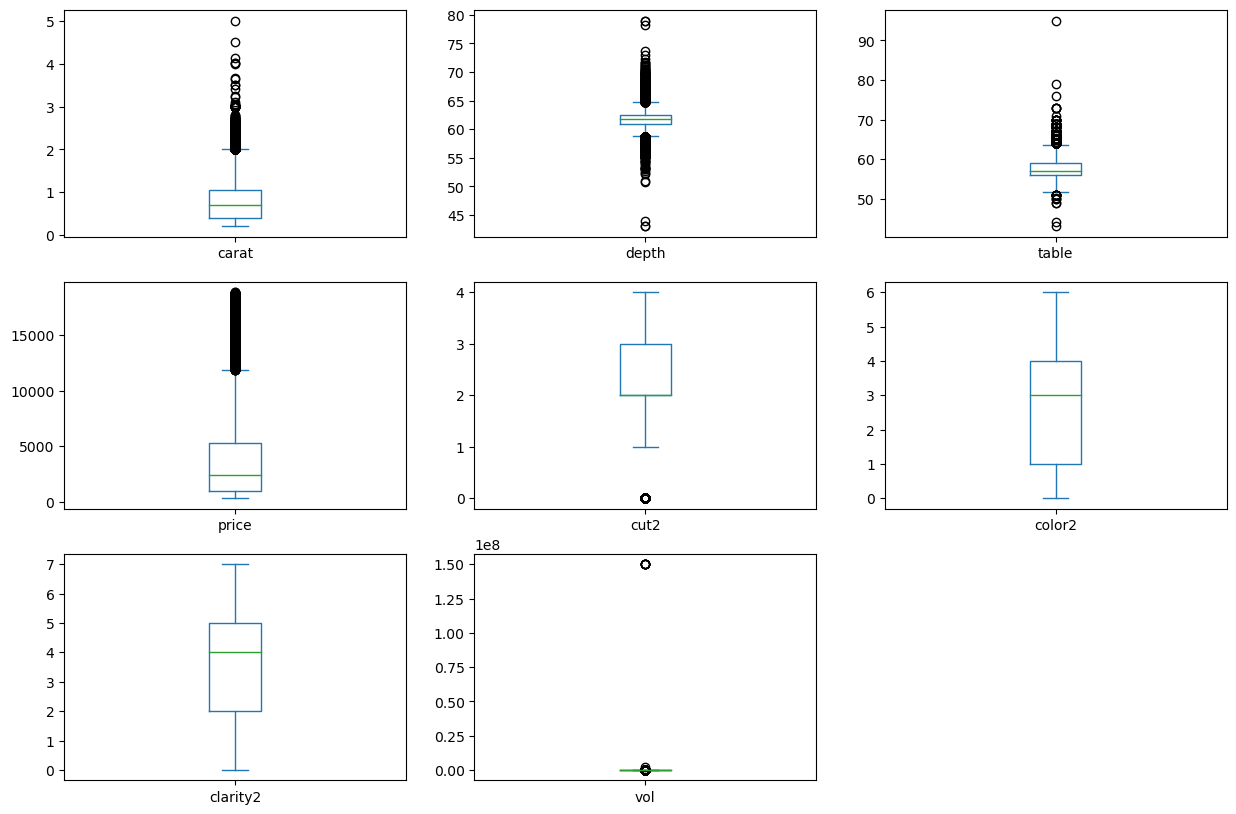

In [20]:
df.plot(kind='box',figsize=(15,10),subplots=True,layout=(3,3))
plt.show()

Outlier handling: 
After visualizing the data we were able to distinguish the features that have outliers.

In [21]:
df_clip = df.copy() # clip remaining outliers
mean, std = df.carat.mean(), df.carat.std()
df_clip['carat_was_outlier'] = np.where(
    (df_clip['carat'] < mean - 3 * std), -1,
    np.where(
        (df_clip['carat'] > mean + 3 * std), 1, 0
    )
) # If first condition is True insert 1 else if False check whether the second condition is True then insert 1 else insert 0
df_clip.loc[df_clip['carat_was_outlier'] == -1, 'carat'] = mean - 3 * std
df_clip.loc[df_clip['carat_was_outlier'] == 1, 'carat'] = mean + 3 * std


In [22]:
mean, std = df.depth.mean(), df.depth.std()
df_clip['depth_was_outlier'] = np.where(
    (df_clip['depth'] < mean - 3 * std), -1,
    np.where(
        (df_clip['depth'] > mean + 3 * std), 1, 0
    )
) # If first condition is True insert 1 else if False check whether the second condition is True then insert 1 else insert 0
df_clip.loc[df_clip['depth_was_outlier'] == -1, 'depth'] = mean - 3 * std
df_clip.loc[df_clip['depth_was_outlier'] == 1, 'depth'] = mean + 3 * std


In [23]:
mean, std = df.table.mean(), df.table.std()
df_clip['table_was_outlier'] = np.where(
    (df_clip['table'] < mean - 3 * std), -1,
    np.where(
        (df_clip['table'] > mean + 3 * std), 1, 0
    )
) # If first condition is True insert 1 else if False check whether the second condition is True then insert 1 else insert 0
df_clip.loc[df_clip['table_was_outlier'] == -1, 'table'] = mean - 3 * std
df_clip.loc[df_clip['table_was_outlier'] == 1, 'table'] = mean + 3 * std


In [24]:
mean, std = df.price.mean(), df.price.std()
df_clip['price_was_outlier'] = np.where(
    (df_clip['price'] < mean - 3 * std), -1,
    np.where(
        (df_clip['price'] > mean + 3 * std), 1, 0
    )
) # If first condition is True insert 1 else if False check whether the second condition is True then insert 1 else insert 0
df_clip.loc[df_clip['price_was_outlier'] == -1, 'price'] = mean - 3 * std
df_clip.loc[df_clip['price_was_outlier'] == 1, 'price'] = mean + 3 * std
df_clip

carat      depth      table   price  cut2  color2  clarity2  \
0       0.23  61.500000  55.000000   326.0     2       1         3   
1       0.21  59.800000  61.000000   326.0     3       1         2   
2       0.23  57.451541  64.160656   327.0     1       1         4   
3       0.29  62.400000  58.000000   334.0     3       5         5   
4       0.31  63.300000  58.000000   335.0     1       6         3   
...      ...        ...        ...     ...   ...     ...       ...   
53935   0.72  60.800000  57.000000  2757.0     2       0         2   
53936   0.72  63.100000  55.000000  2757.0     1       0         2   
53937   0.70  62.800000  60.000000  2757.0     4       0         2   
53938   0.86  61.000000  58.000000  2757.0     3       4         3   
53939   0.75  62.200000  55.000000  2757.0     2       0         3   

              vol  carat_was_outlier  depth_was_outlier  table_was_outlier  \
0       38.202030                  0                  0                  0   
1       34.505856                  0                  0                  0   
2       38.076885                  0                 -1                  1   
3       46.724580                  0                  0                  0   
4       51.917250                  0                  0                  0   
...           ...                ...                ...                ...   
53935  115.920000                  0                  0                  0   
53936  118.110175                  0                  0                  0   
53937  114.449728                  0                  0                  0   
53938  140.766120                  0                  0                  0   
53939  124.568444                  0                  0                  0   

       price_was_outlier  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
...                  ...  
53935                  0  
53936                  0  
53937                  0  
53938                  0  
53939                  0  

[53940 rows x 12 columns]

In [25]:
dff= df_clip.drop(columns = ["carat_was_outlier", "depth_was_outlier", "table_was_outlier", "price_was_outlier"]) # drop columns that we dont need anymore
dff.head()

carat      depth      table  price  cut2  color2  clarity2        vol
0   0.23  61.500000  55.000000  326.0     2       1         3  38.202030
1   0.21  59.800000  61.000000  326.0     3       1         2  34.505856
2   0.23  57.451541  64.160656  327.0     1       1         4  38.076885
3   0.29  62.400000  58.000000  334.0     3       5         5  46.724580
4   0.31  63.300000  58.000000  335.0     1       6         3  51.917250

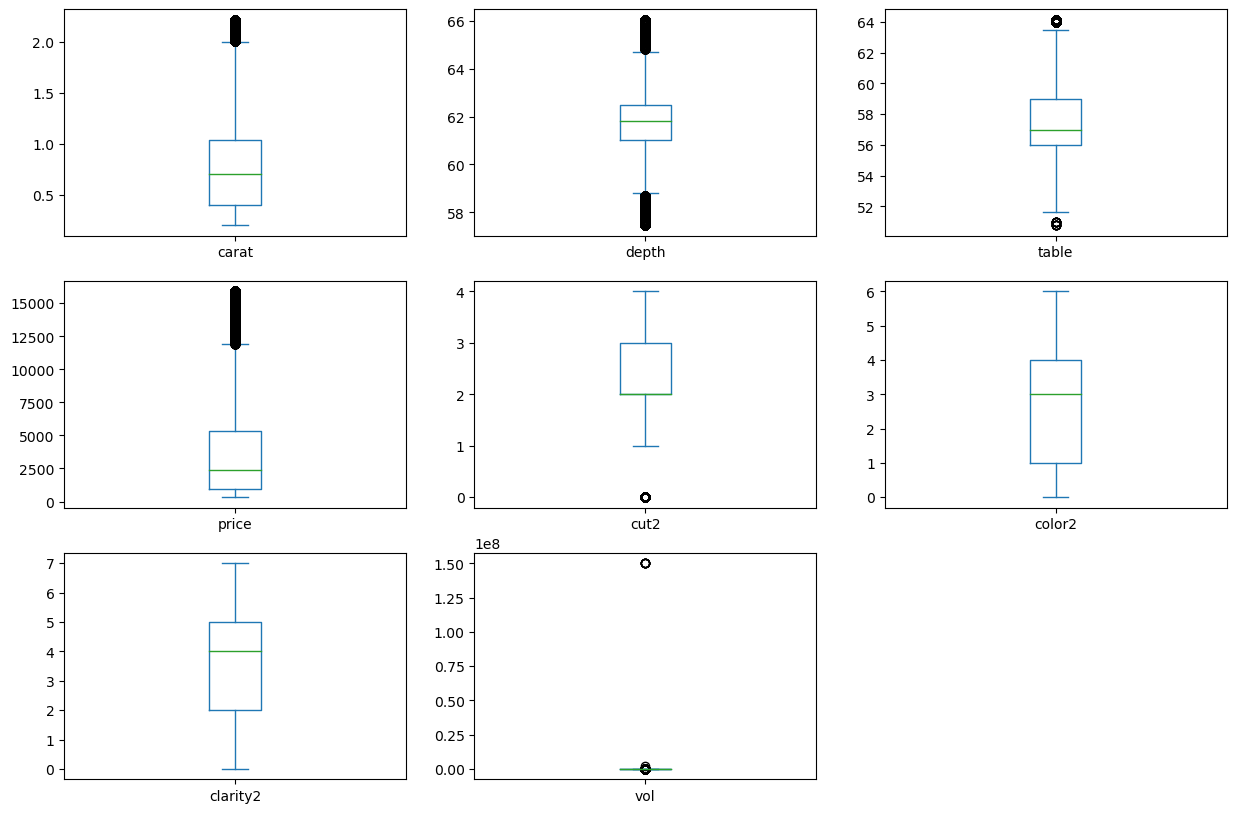

In [26]:
dff.plot(kind='box',figsize=(15,10),subplots=True,layout=(3,3))
plt.show()

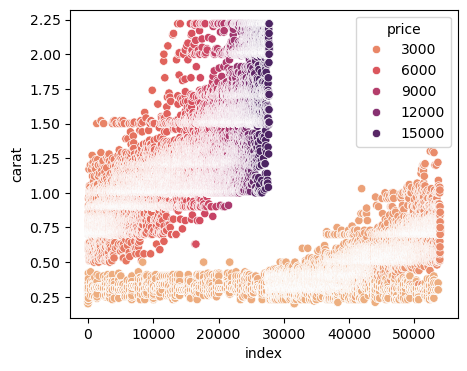

In [25]:
plt.figure(figsize=(5,4))
sns.scatterplot(x=dff.index,y=dff['carat'], hue=dff['price'], palette= 'flare')
plt.xlabel("index")
plt.ylabel("carat")
plt.show()

<AxesSubplot:>

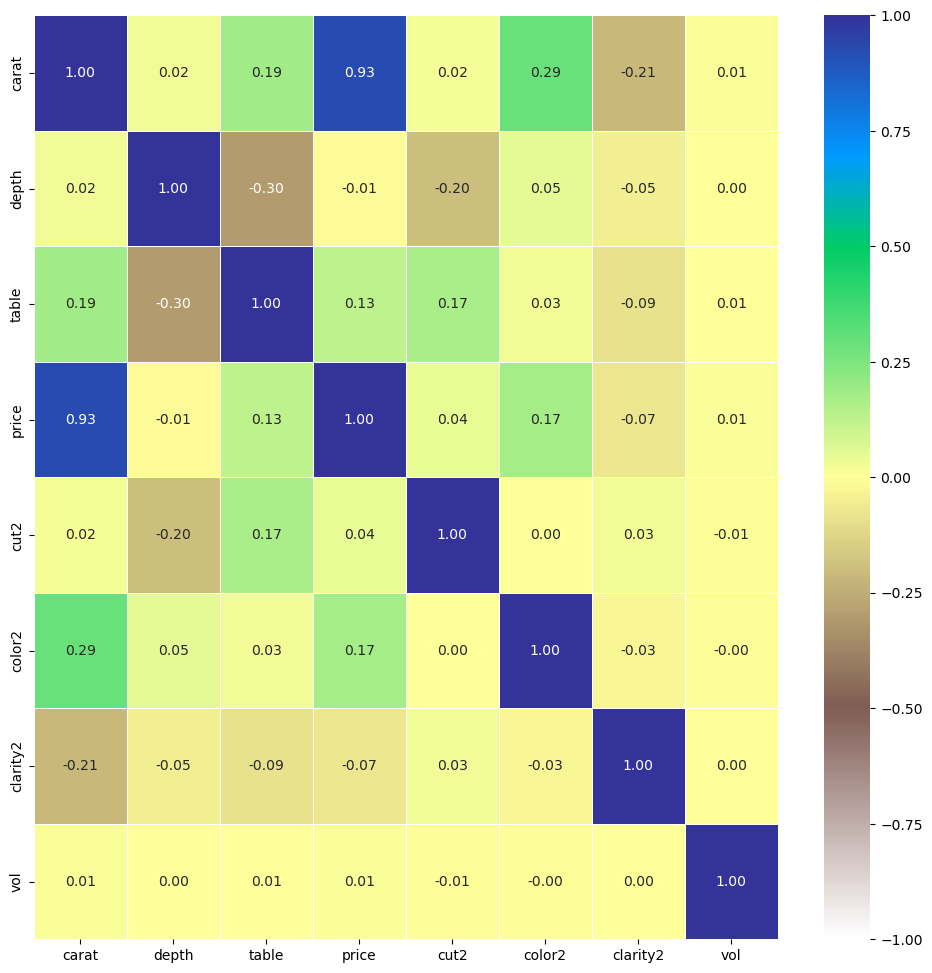

In [27]:
fig, ax = plt.subplots(figsize=(12,12))
corr1   = dff.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr1, ax=ax, annot=True, cmap='terrain_r', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)

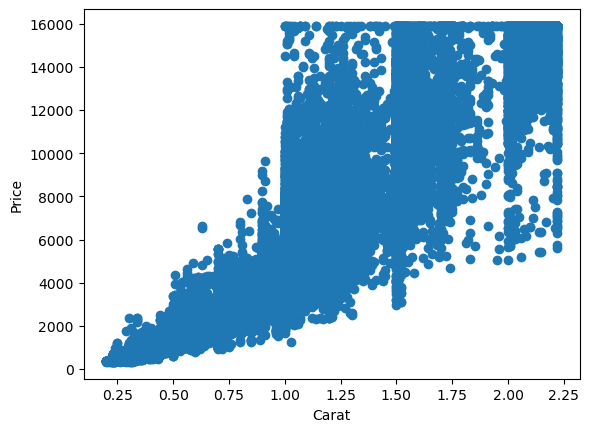

In [28]:
plt.scatter(data = dff, x = 'carat', y = 'price');
plt.xlabel('Carat');
plt.ylabel('Price');

Observations: we can tell that the carat feature and the target variable feature: price are linearly correlated. The volume and the color are slightly less correlated to the price but still play a role in the price. 

# Linear Regression

After cleaning up the data set and visualizing  it, we can now move onto the machine learning models

In [29]:
#creating the test train split to start the linear regression model
X = dff.drop(["price"],axis=1).values
y = dff["price"].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

print('train set:',X_train.shape)
print('test set:',X_test.shape)

train set: (43152, 7)
test set: (10788, 7)


In [30]:
# Create a linear model (OLS Model)
linear_model = LinearRegression(normalize=True)

In [31]:
# Fit the OLS model to the data
linear_model.fit(X_train,y_train)

LinearRegression(normalize=True)

In [32]:
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

In [33]:
#r2 calculation
print('R² score on train data: ', metrics.r2_score(y_train, y_train_pred))
print('R² score on test data: ', metrics.r2_score(y_test, y_test_pred))

R² score on train data:  0.8921099709762164
R² score on test data:  0.8918864762741641


In [34]:
# mae calculation
mae_train_dt = metrics.mean_absolute_error(y_train, y_train_pred)
mae_test_dt = metrics.mean_absolute_error(y_test, y_test_pred)

print('Mean absolute Error on train data: ', mae_train_dt)
print('Mean absolute Error on test data: ', mae_test_dt)

Mean absolute Error on train data:  890.5904042769637
Mean absolute Error on test data:  892.9728302792798


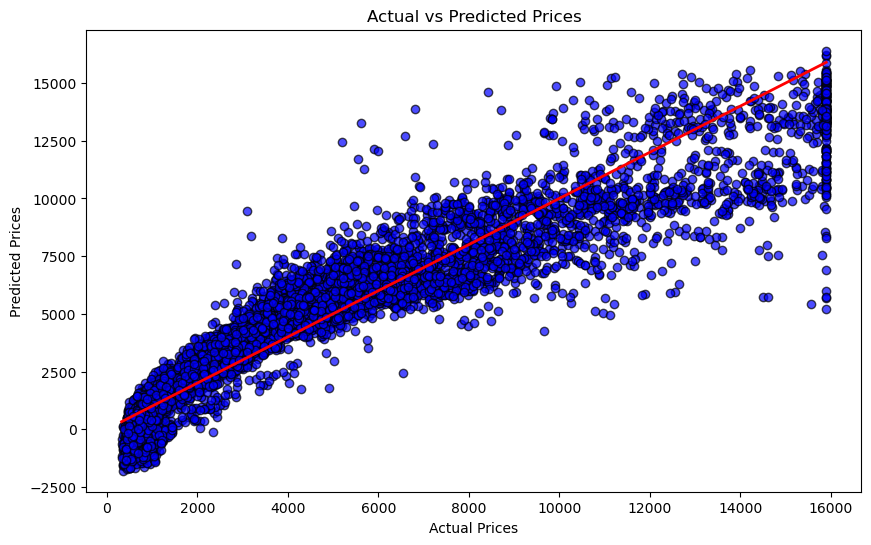

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Diagonal line

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# Create a pipeline for the linear regression model
pipeline = make_pipeline(StandardScaler(), LinearRegression())

# Define the hyperparameters to tune
param_grid = {
    'linearregression__fit_intercept': [True, False],
    'linearregression__normalize': [True, False],
    'linearregression__copy_X': [True, False],
    # Add more hyperparameters to tune as needed
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_model = grid_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Predict on test data
y_test_pred = best_model.predict(X_test)

# Calculate R² score for the best model
r2_test = metrics.r2_score(y_test, y_test_pred)

print('Best Model Parameters:', grid_search.best_params_)
print('R² score on test data (Best Model): ', r2_test)

/Users/mariamsherif/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/mariamsherif/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.

Best Model Parameters: {'linearregression__copy_X': True, 'linearregression__fit_intercept': True, 'linearregression__normalize': True}
R² score on test data (Best Model):  0.8918864762741643


Linear regression results: we can tell that the model rightly fits the data. We can tell that the hyperparameter tuning didn't effect the original r2 score much

# Decision Tree

In [39]:
#creating the test train split to start the decision tree model
X = dff.drop(["price"],axis=1).values
y = dff["price"].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

print('train set:',X_train.shape)
print('test set:',X_test.shape)

train set: (43152, 7)
test set: (10788, 7)


In [40]:
clf_dt = DecisionTreeRegressor(random_state=40)
clf_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=40)

In [41]:
y_train_pred = clf_dt.predict(X_train)
y_test_pred = clf_dt.predict(X_test)
print('R² score on train data: ', metrics.r2_score(y_train, y_train_pred))
print('R² score on test data: ', metrics.r2_score(y_test, y_test_pred))

R² score on train data:  0.9999274979801199
R² score on test data:  0.9732522712084044


In [42]:
mae_train_dt = metrics.mean_absolute_error(y_train, y_train_pred)
mae_test_dt = metrics.mean_absolute_error(y_test, y_test_pred)

print('Mean absolute Error on train data (Decision Tree): ', mae_train_dt)
print('Mean absolute Error on test data (Decision Tree): ', mae_test_dt)

Mean absolute Error on train data (Decision Tree):  13.392507861075588
Mean absolute Error on test data (Decision Tree):  325.8067490008258


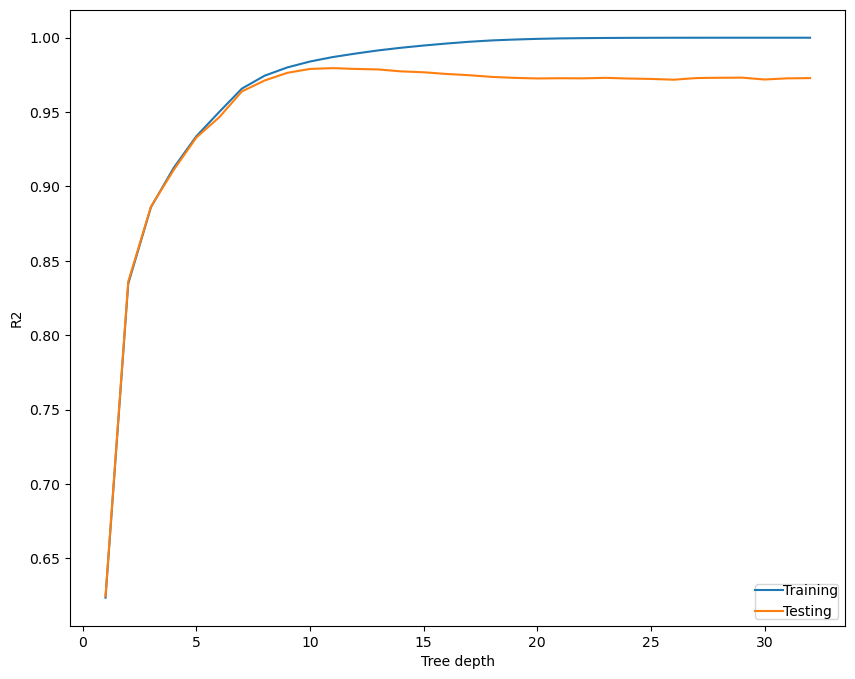

In [43]:
max_depth = np.linspace(1,32,32,dtype='int32')
r2_train,r2_test=[],[]

for i in max_depth:
    clf_dt=tree.DecisionTreeRegressor(max_depth=i, random_state=40)
    clf_dt.fit(X_train,y_train)
    y_train_pred = clf_dt.predict(X_train)
    y_test_pred = clf_dt.predict(X_test)
    
    r2_train.append(metrics.r2_score(y_train, y_train_pred))
    r2_test.append(metrics.r2_score(y_test, y_test_pred))

ax= plt.figure(figsize=(10, 8))
plt.plot(max_depth,r2_train)
plt.plot(max_depth,r2_test)
plt.ylabel('R2')
plt.xlabel('Tree depth')
plt.legend(['Training', 'Testing'],loc='lower right', borderpad=0, handletextpad=0) 
plt.show()

We can see that our model rightly fits for large depth values. The tree perfectly predicts almost all of the train data, however, it performs slightly worse
to generalise the findings for the new test data. 
We can also deduce that a tree with max depth=10 provides the best accuracy

In [44]:
clf_dt = DecisionTreeRegressor(max_depth=10, random_state=40)
clf_dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=40)

In [45]:
y_train_pred = clf_dt.predict(X_train)
y_test_pred = clf_dt.predict(X_test)
print('R² score on train data: ', metrics.r2_score(y_train, y_train_pred))
print('R² score on test data: ', metrics.r2_score(y_test, y_test_pred))

R² score on train data:  0.983939156938431
R² score on test data:  0.9789587585090904


In [46]:
mae_train_dt = metrics.mean_absolute_error(y_train, y_train_pred)
mae_test_dt = metrics.mean_absolute_error(y_test, y_test_pred)

print('Mean absolute Error on train data (Decision Tree): ', mae_train_dt)
print('Mean absolute Error on test data (Decision Tree): ', mae_test_dt)

Mean absolute Error on train data (Decision Tree):  279.4075451741599
Mean absolute Error on test data (Decision Tree):  314.8589896069341


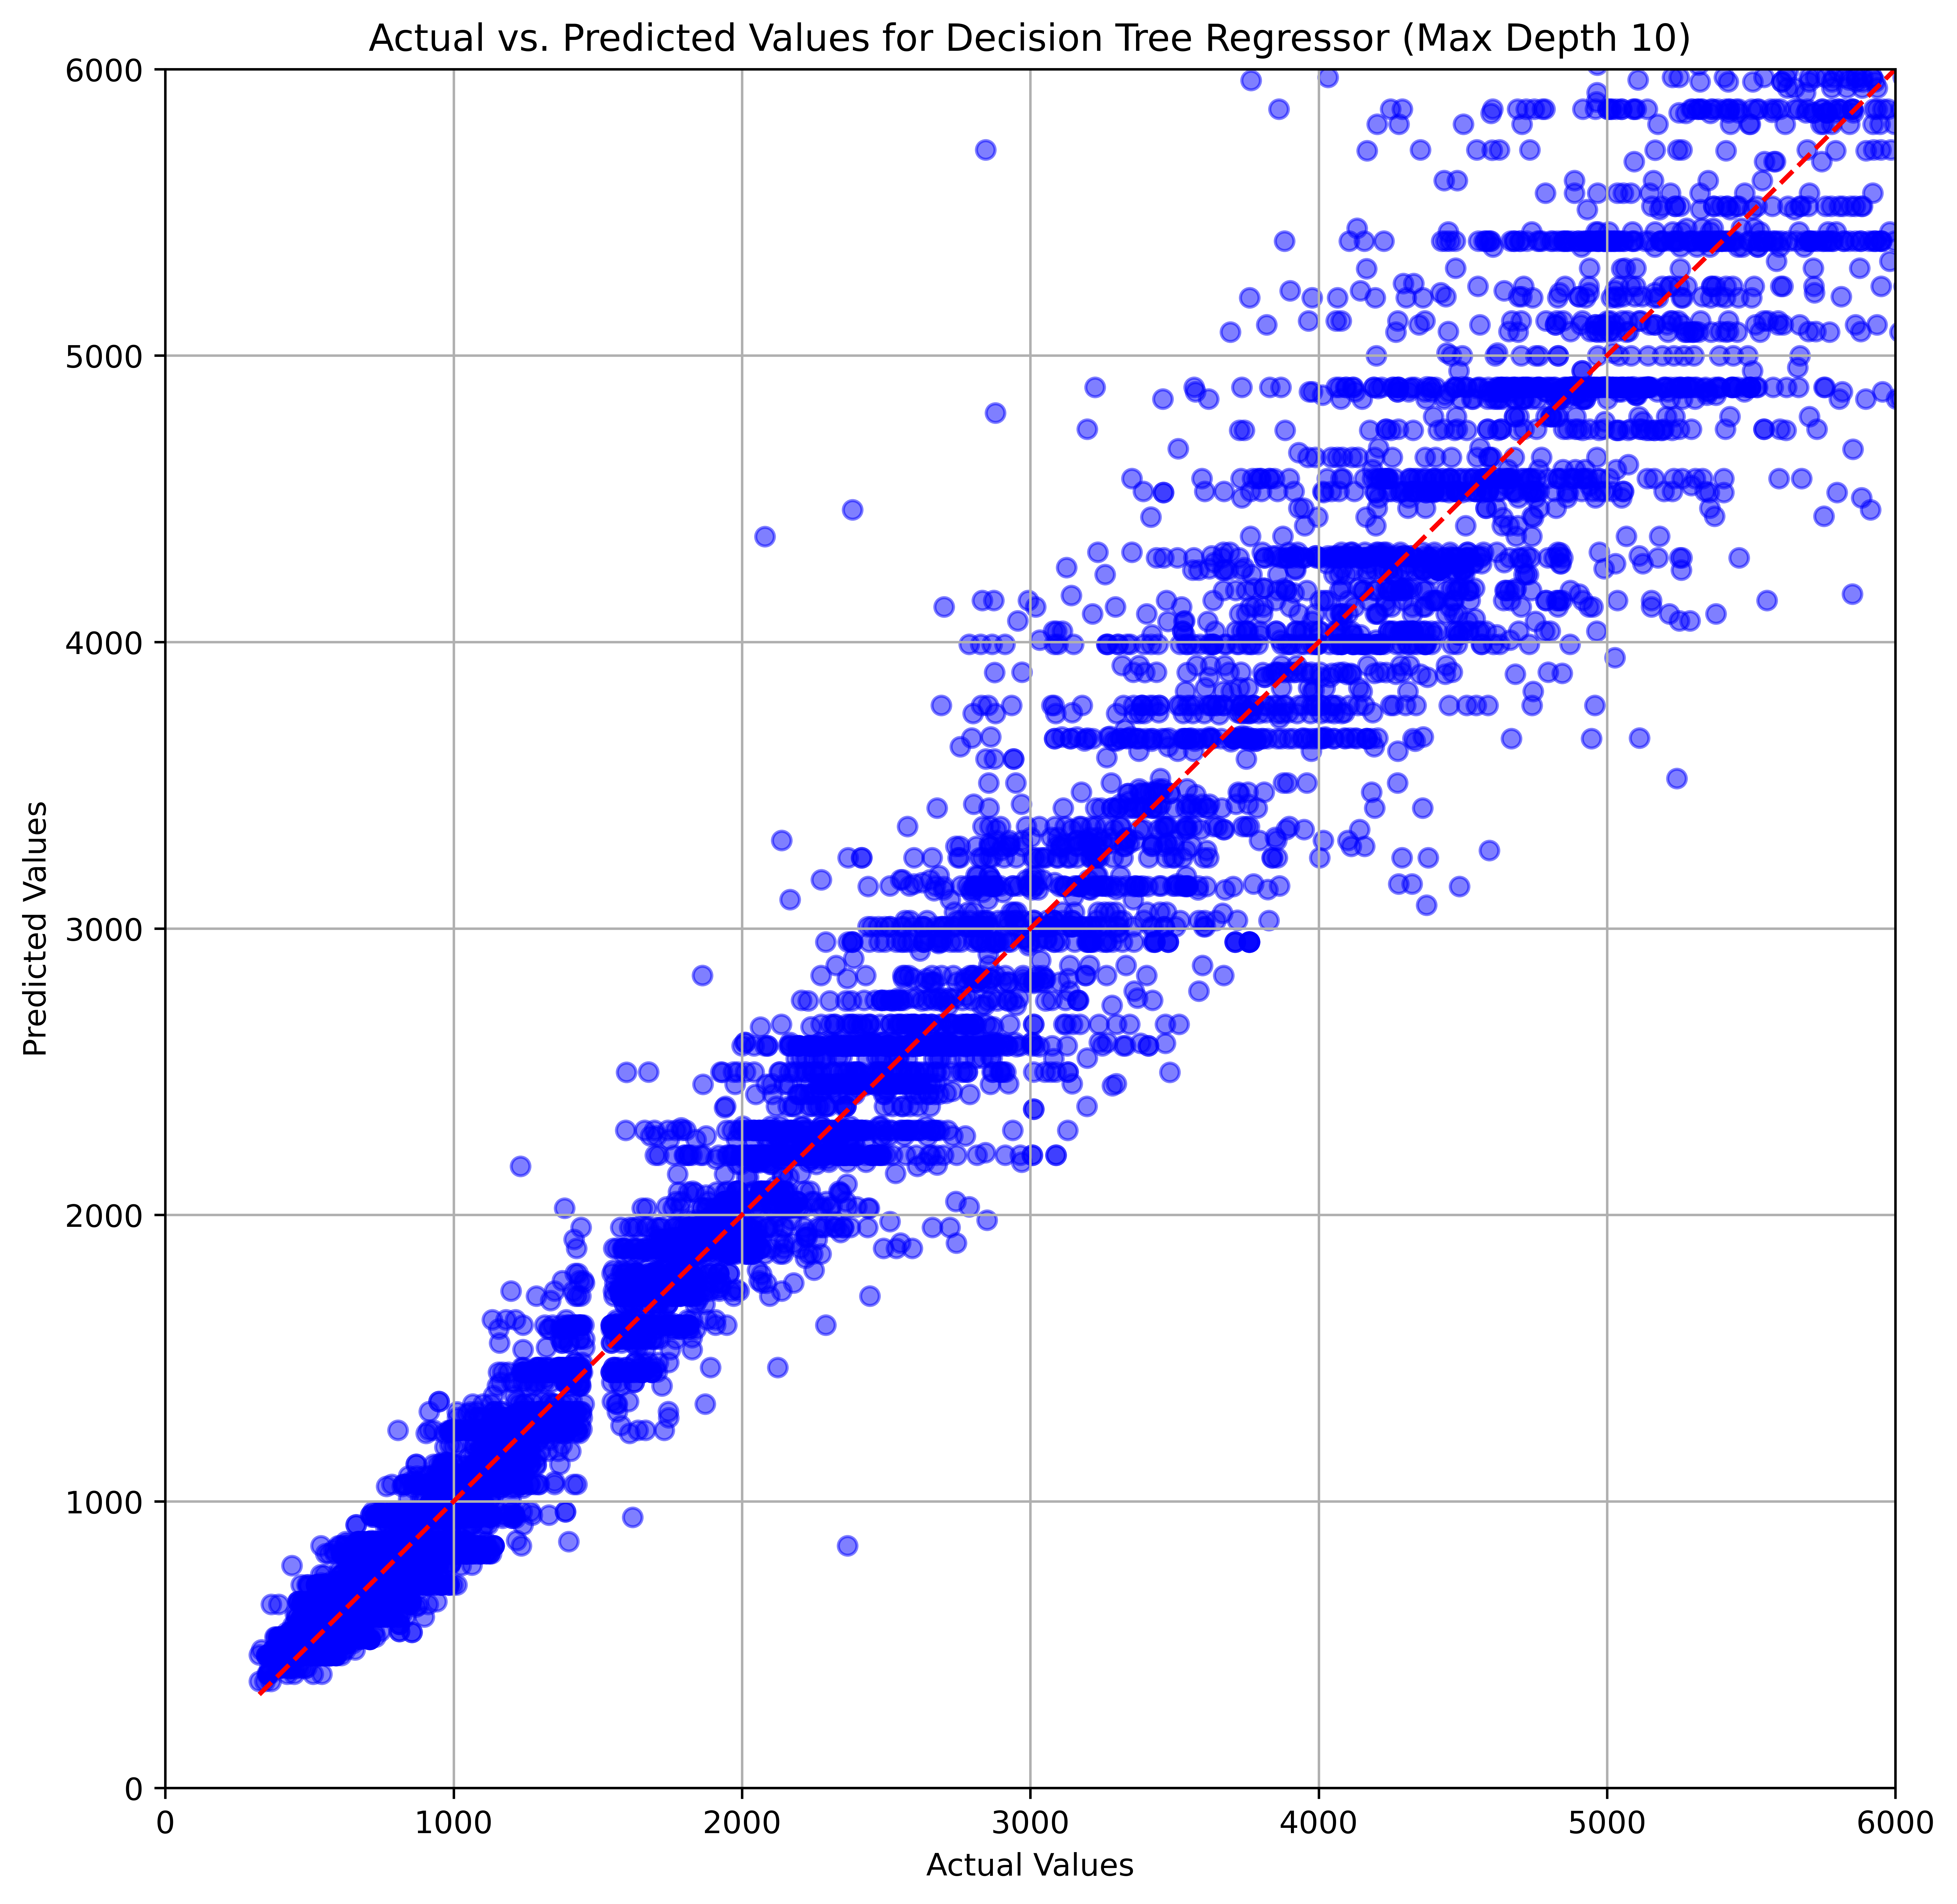

In [169]:
# Create scatter plot
plt.figure(figsize=(10, 10), dpi=800)
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Decision Tree Regressor (Max Depth 10)')
plt.grid(True)
plt.xlim(0, 6000)
plt.ylim(0, 6000)
plt.show()

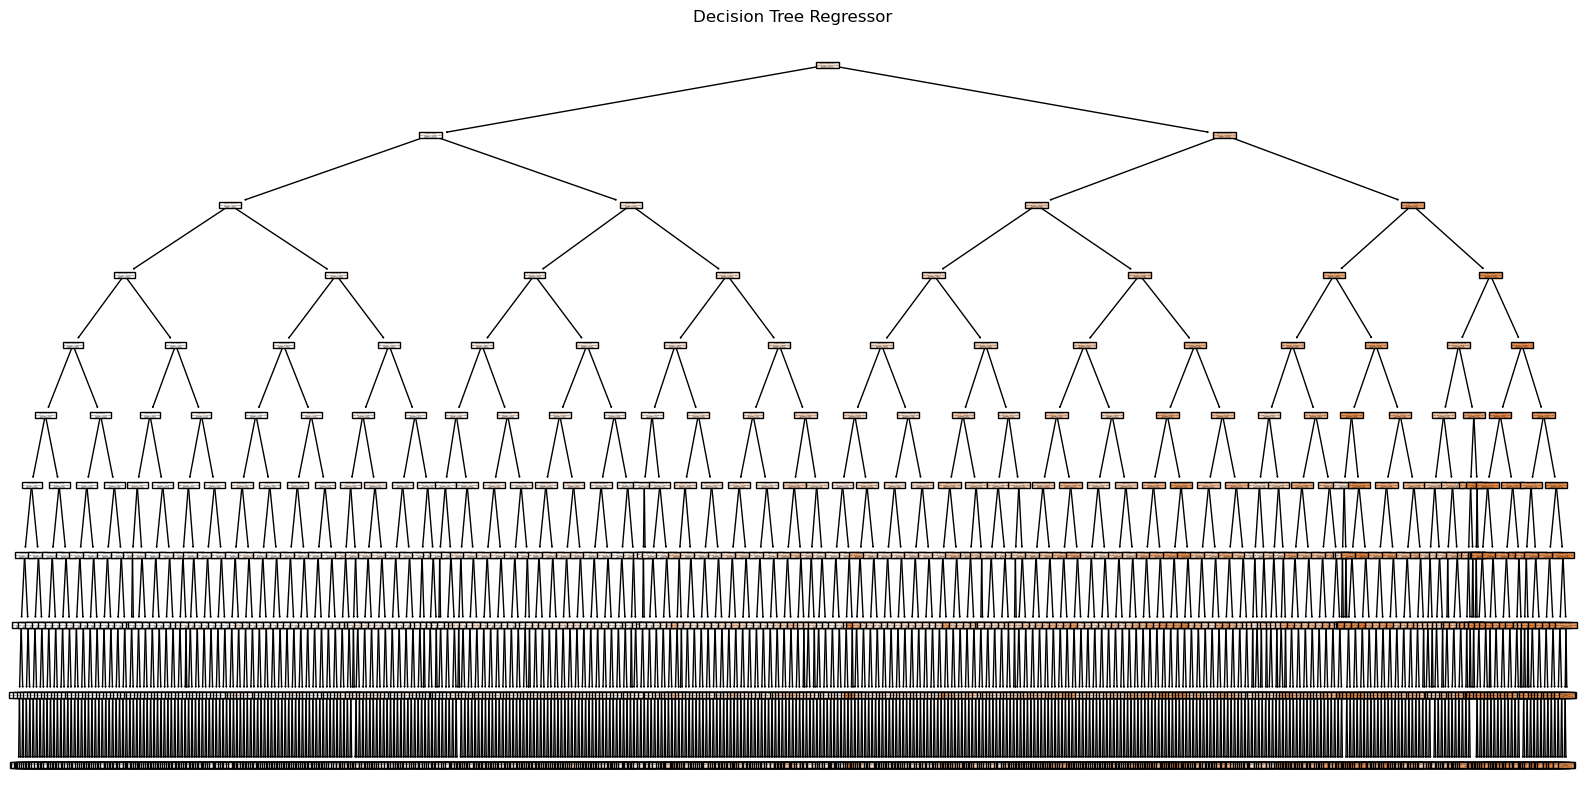

In [50]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf_dt, feature_names=dff.columns, filled=True)
plt.title('Decision Tree Regressor')
plt.show()

Decision tree results: we can tell that the decision tree has a higher r2 score than the linear regression. This is due to the hyperparameter tuning we did on the max tree depth, aka pruning that increased the trees accuracy even more.

# KNN

In [196]:
X = dff.drop(["price"],axis=1).values
y = dff["price"].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

print('train set:',X_train.shape)
print('test set:',X_test.shape)

train set: (43152, 7)
test set: (10788, 7)


In [199]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

k = 3
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
print('R² score on train data: ', metrics.r2_score(y_train, y_train_pred))
print('R² score on test data: ', metrics.r2_score(y_test, y_test_pred))


R² score on train data:  0.9742823881911907
R² score on test data:  0.9464175081153541


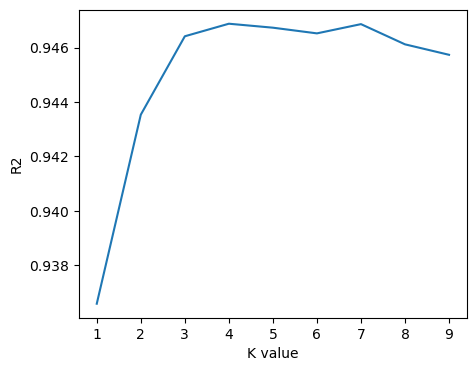

In [193]:
#parameter tuning
score_list=[]
#calculating the best k for getting the highest accuracy percentage
k_range=range(1,10)
for i in k_range:
    
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    score_list.append(metrics.r2_score(y_test,pred_i))

plt.figure(figsize=(5,4))
plt.plot(k_range,score_list)
plt.xlabel("K value")
plt.ylabel("R2")
plt.show()

In [200]:
k = 7
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
print('R² score on train data: ', metrics.r2_score(y_train, y_train_pred))
print('R² score on test data: ', metrics.r2_score(y_test, y_test_pred))

R² score on train data:  0.9600748125154487
R² score on test data:  0.9468641950616182


# Conclusion: R2 Tree> R2 KNN > R2 Linear Regression